# Working with Missing data in pandas

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np

We begin by defining a pandas dataframe that contains some cells with missing values. Note that pandas, in addition to allowing us to create dataframes from a variety of files, also supports explicit declaration.

In [3]:
incomplete_df = pd.DataFrame({'id': [1,2,3,2,2,3,1,1,1,2,4],
                              'type': ['one', 'one', 'two', 'three', 'two', 'three', 'one', 'two', 'one', 'three','one'],
                              'amount': [345,928,np.NAN,645,113,942,np.NAN,539,np.NAN,814,np.NAN] 
                             }, columns=['id','type','amount'])

Column 'amount' is the only one with missing values.

In [4]:
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,NaN
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,NaN
7,1,two,539.0
8,1,one,NaN
9,2,three,814.0


Recall that summary statistics and arithmetic with missing data is natively supported by pandas. Let's define two series, both containing some missing values.

In [5]:
A = incomplete_df['amount']
B = pd.Series(data=[np.NAN,125,335,345,312,np.NAN,np.NAN,129,551,800,222])

In [6]:
print A 
print '\n'
print B

0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64


0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


The mean is computed normally and missing values are ignored:

In [7]:
A.mean()

618.0

Min, Max, STD and Variance all work even when data are missing:

In [8]:
print B.min()
print B.max()
print B.std()
print B.var()

125.0
800.0
226.904597636
51485.6964286


We can also perform element-wise arithmetic operations between series with missing data. Note that by definition the result of any operation that involves missing values is NaN.

In [9]:
A+B

0        NaN
1     1053.0
2        NaN
3      990.0
4      425.0
5        NaN
6        NaN
7      668.0
8        NaN
9     1614.0
10       NaN
dtype: float64

### Filling missing values

Recall that pandas has a function that allows you to drop any rows in a dataframe (or elements in a series) that contain a missing value.

In [10]:
A

0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64

In [11]:
A.dropna()

0    345.0
1    928.0
3    645.0
4    113.0
5    942.0
7    539.0
9    814.0
Name: amount, dtype: float64

However, very often you may wish to fill in those missing values rather than simply dropping them. Of course, pandas also has that functionality. For example, we could fill missing values with a scalar number, as shown below.

In [12]:
A.fillna(-1)

0     345.0
1     928.0
2      -1.0
3     645.0
4     113.0
5     942.0
6      -1.0
7     539.0
8      -1.0
9     814.0
10     -1.0
Name: amount, dtype: float64

That actually works with any data type.

In [13]:
A.fillna('missing data')

0              345
1              928
2     missing data
3              645
4              113
5              942
6     missing data
7              539
8     missing data
9              814
10    missing data
Name: amount, dtype: object

As such, we can use this functionality to fill in the gaps with the average value computed across the non-missing values.

In [14]:
A.fillna(A.mean())

0     345.0
1     928.0
2     618.0
3     645.0
4     113.0
5     942.0
6     618.0
7     539.0
8     618.0
9     814.0
10    618.0
Name: amount, dtype: float64

Even better, if we want to fill in the gaps with mean values of corresponding *id's* (recall our initial dataframe printed below), the following two lines of code perform that seemingly complex task.

In [15]:
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,NaN
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,NaN
7,1,two,539.0
8,1,one,NaN
9,2,three,814.0


In [16]:
# Fill in gaps in the 'amount' column with means obtained from corresponding id's in the first column
incomplete_df["amount"].fillna(incomplete_df.groupby("id")["amount"].transform("mean"),inplace=True)
# If there is no corresponding id, simply use the overall mean
incomplete_df["amount"].fillna(incomplete_df["amount"].mean(), inplace=True)
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,942.0
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,442.0
7,1,two,539.0
8,1,one,442.0
9,2,three,814.0


You can fill values forwards and backwards with the flags *pad* / *ffill* and *bfill* / *backfill*

In [17]:
print B
print '\n'
print B.fillna(method='pad')

0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5     312.0
6     312.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


We can set a limit if we only want to replace consecutive gaps.

In [18]:
B.fillna(method='bfill',limit=1)

0     125.0
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6     129.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64

There is also a function that does linear interpolation. The keyword *method* gives you access to fancier methods for interpolation, some of which require SciPy.

In [19]:
print B
print '\n'
print B.interpolate()

0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5     251.0
6     190.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


In [20]:
B.interpolate(method='barycentric')

0            NaN
1     125.000000
2     335.000000
3     345.000000
4     312.000000
5     146.563492
6      -1.849206
7     129.000000
8     551.000000
9     800.000000
10    222.000000
dtype: float64

In [21]:
B.interpolate(method='pchip')

0            NaN
1     125.000000
2     335.000000
3     345.000000
4     312.000000
5     246.420420
6     167.376877
7     129.000000
8     551.000000
9     800.000000
10    222.000000
dtype: float64

Below we compare three different methods.

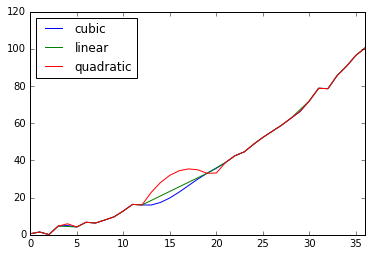

In [22]:
np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, .25)**2 + np.random.randn(37))
bad = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[bad] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()